In [6]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [7]:
df = pd.read_csv(r"C:\Users\taran\OneDrive\Documents\ML Datasets\product.csv")
df.head()

,order_id,user_id,page_id,product,site_version,time,title,target
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,6f4922f45568161a8cdf4ad2299f6d23,sneakers,desktop,2019-01-11 09:24:43,banner_click,0
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,4e732ced3463d06de0ca9a15b6153677,sneakers,desktop,2019-01-09 09:38:51,banner_show,0
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,5c45a86277b8bf17bff6011be5cfb1b9,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:58:18,banner_show,0
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:59:15,banner_click,0


**Exploratory Data Analysis**

In [5]:
columns = df.columns[[3,4,6,7]].tolist()
print(columns)

['product', 'site_version', 'title', 'target']


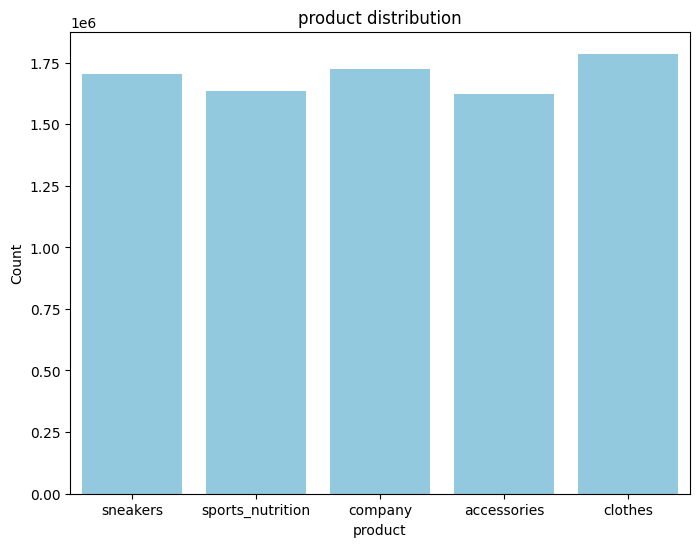

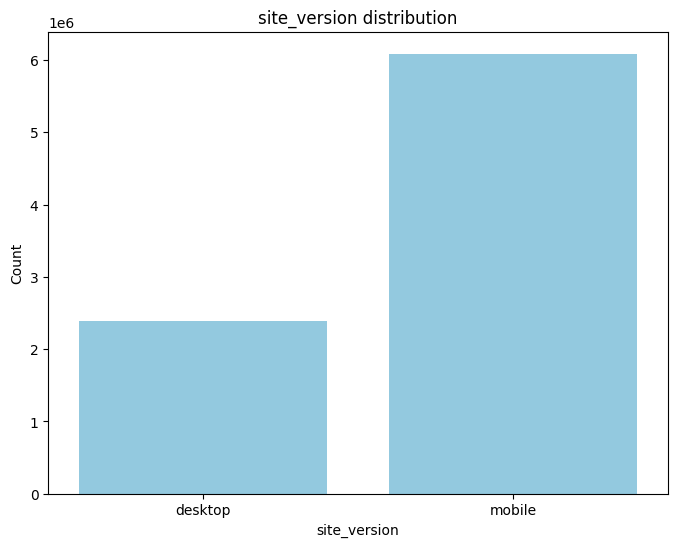

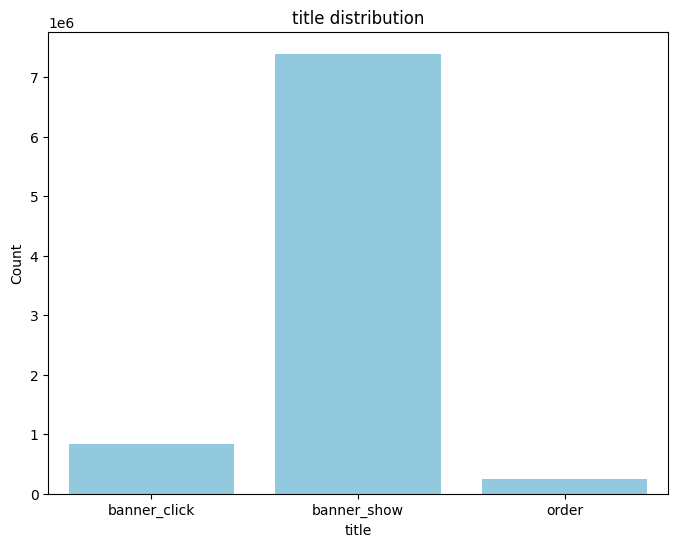

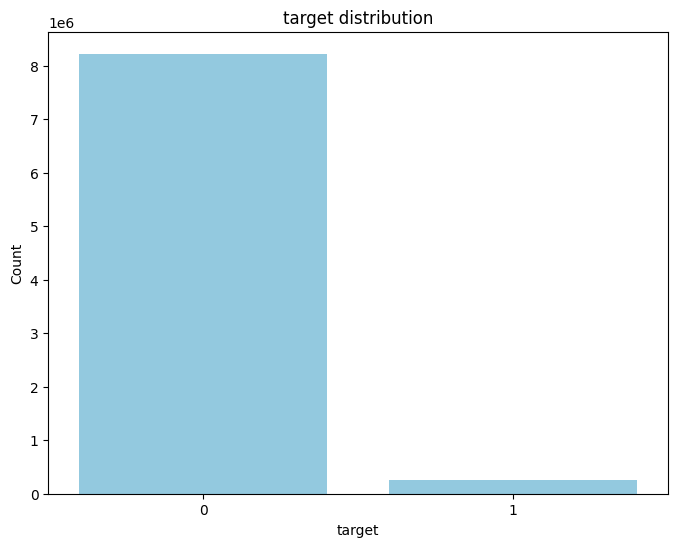

In [9]:
#Count Plot
for col in columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df, color='skyblue')
    plt.title(f"{col} distribution")
    plt.xlabel(f"{col}")
    plt.ylabel("Count")
    plt.show()

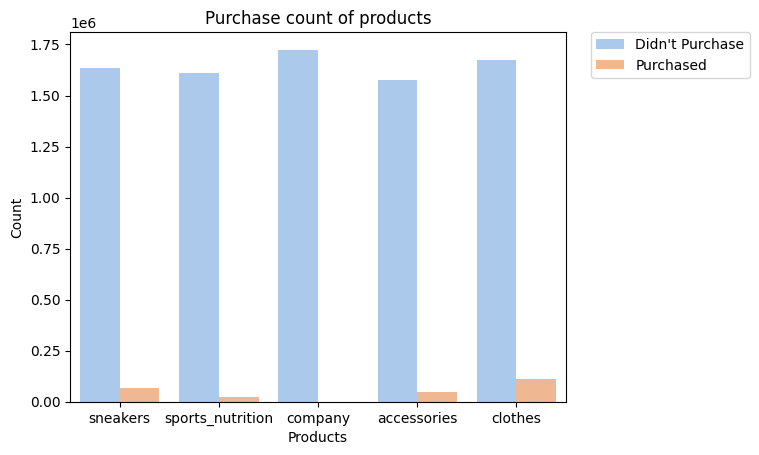

In [13]:
sns.countplot(x='product', data=df, hue=df['target'].map({0: "Didn't Purchase", 1: "Purchased"}), palette='pastel', legend=True)
plt.title("Purchase count of products")
plt.xlabel("Products")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.ylabel("Count")
plt.show()

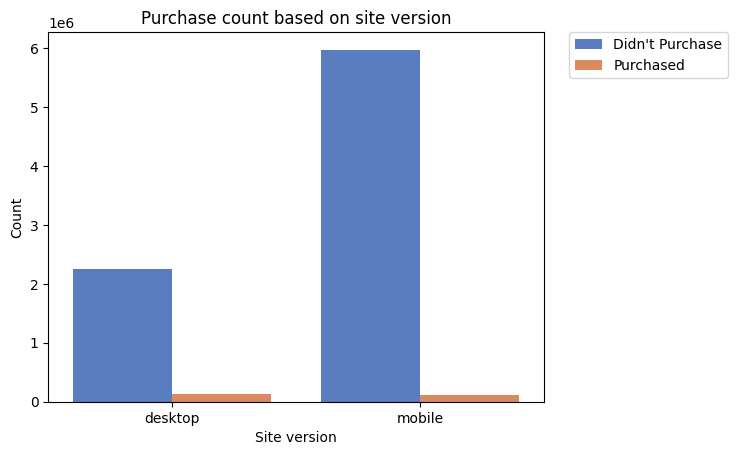

In [14]:
sns.countplot(x='site_version', data=df, hue=df['target'].map({0: "Didn't Purchase", 1: "Purchased"}), palette='muted', legend=True)
plt.title("Purchase count based on site version")
plt.xlabel("Site version")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.ylabel("Count")
plt.show()

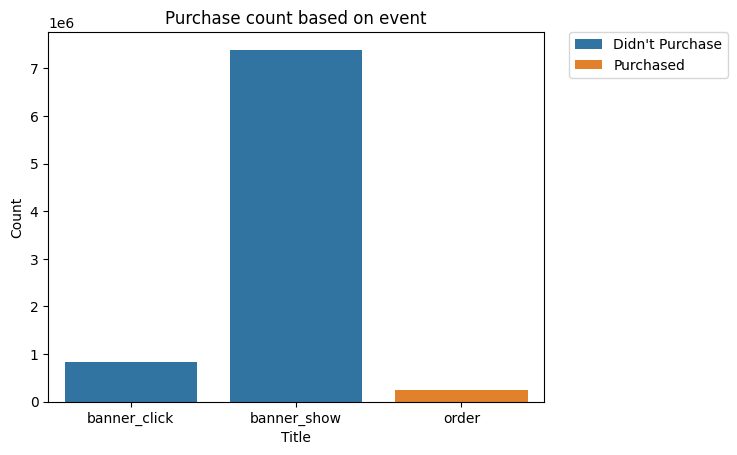

In [15]:
sns.countplot(x='title', data=df, hue=df['target'].map({0: "Didn't Purchase", 1: "Purchased"}), palette='tab10', legend=True)
plt.title("Purchase count based on event")
plt.xlabel("Title")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.ylabel("Count")
plt.show()

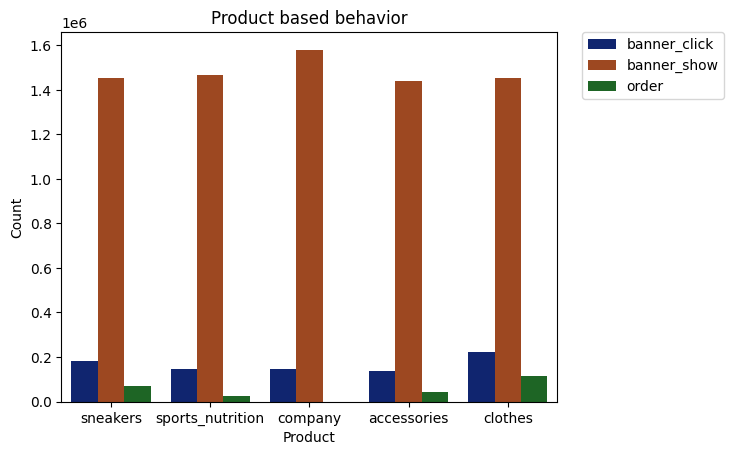

In [4]:
sns.countplot(x='product', data=df, hue='title', palette='dark', legend=True)
plt.title("Product based behavior")
plt.xlabel("Product")
plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

**Data Preprocessing**

In [8]:
#Defining the training dataset
X = df.iloc[:, 3:]
X.head()

,product,site_version,time,title,target
0,sneakers,desktop,2019-01-11 09:24:43,banner_click,0
1,sneakers,desktop,2019-01-09 09:38:51,banner_show,0
2,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0
3,company,desktop,2019-01-03 08:58:18,banner_show,0
4,company,desktop,2019-01-03 08:59:15,banner_click,0


In [9]:
X['time'].dtype

dtype('O')

In [10]:
#Converting the time column into hour of the day
X['time'] = pd.to_datetime(X['time'])  #Converting its dtype from object to datetime
X['hour'] = X['time'].dt.hour  #Extracting hour of the day from time
X.drop(columns=['time'], inplace=True)  #Removing the time column
X.head()

,product,site_version,title,target,hour
0,sneakers,desktop,banner_click,0,9
1,sneakers,desktop,banner_show,0,9
2,sports_nutrition,desktop,banner_show,0,9
3,company,desktop,banner_show,0,8
4,company,desktop,banner_click,0,8


In [11]:
#Encoding the categorical columns
X = pd.get_dummies(X, columns=['product', 'site_version', 'title'], drop_first=True)
X.head()

,target,hour,product_clothes,product_company,product_sneakers,product_sports_nutrition,site_version_mobile,title_banner_show,title_order
0,0,9,False,False,True,False,False,False,False
1,0,9,False,False,True,False,False,True,False
2,0,9,False,False,False,True,False,True,False
3,0,8,False,True,False,False,False,True,False
4,0,8,False,True,False,False,False,False,False


In [12]:
#Converting T/F to 1/0
col = X.columns[[2,3,4,5,6,7,8]].tolist()
X[col] = X[col].astype(int)
X.head()

,target,hour,product_clothes,product_company,product_sneakers,product_sports_nutrition,site_version_mobile,title_banner_show,title_order
0,0,9,0,0,1,0,0,0,0
1,0,9,0,0,1,0,0,1,0
2,0,9,0,0,0,1,0,1,0
3,0,8,0,1,0,0,0,1,0
4,0,8,0,1,0,0,0,0,0


**Building the Model**

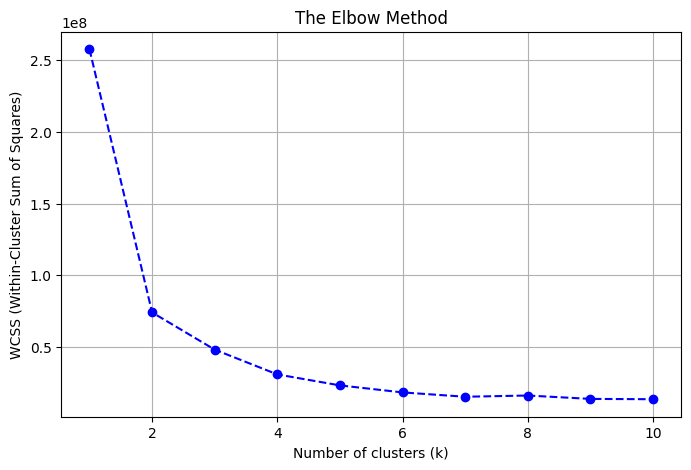

In [25]:
#Elbow method
wcss = []  

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

In [13]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

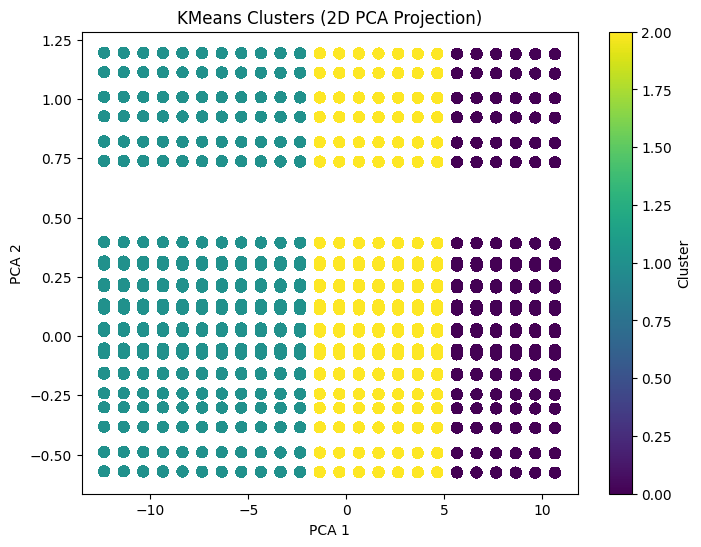

In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X) 

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title("KMeans Clusters (2D PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show()

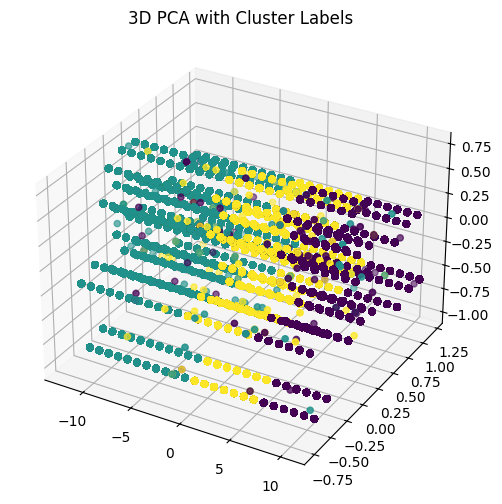

In [52]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='viridis')
plt.title("3D PCA with Cluster Labels")
plt.show()

In [10]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [11]:
#Understanding the Feature Averages per Cluster
X['Cluster'] = labels
cluster_summary = X.groupby('Cluster').mean()
cluster_summary

,target,hour,product_clothes,product_company,product_sneakers,product_sports_nutrition,site_version_mobile,title_banner_show,title_order
Cluster,,,,,,,,,
0,0.037458,19.719496,0.213454,0.201392,0.201759,0.192199,0.716094,0.864681,0.037458
1,0.024998,7.511976,0.209704,0.204687,0.200908,0.193423,0.720031,0.876941,0.024998
2,0.030365,14.669522,0.210877,0.203610,0.200839,0.192790,0.718518,0.872018,0.030365


**Let's interpret cluster 0**
|*Feature*	                |     *Mean Value*	|                  *Interpretation*                  |
|---------------------------|-------------------|----------------------------------------------------|
|target	                    |       0.0374	    |  ~3.7% of users in Cluster 0 made a purchase       |
|hour	                    |       19.71	    |  Most users visited the site around 7:43 PM        |
|product_clothes	        |       0.2134	    |  ~21.3% of events in this cluster were for clothes |
|product_company	        |       0.2013	    |  ~20% were for company/banner-wide ads             |
|product_sneakers	        |       0.2017	    |  ~20.2% were sneaker-related                       |
|product_sports_nutrition	|       0.1921	    |  ~19.2% were for sports nutrition                  |
|site_version_mobile	    |       0.716	    |  71.6% of users were on mobile                     |
|title_banner_show	        |       0.8646	    |  ~86.5% of events were banner shows                  |
|title_order	            |       0.0374	    |  ~3.7% of events were purchases (orders)            |

**Cluster 0 is:**  
- Evening mobile users
- See lots of banners
- Moderate interest in various products
- Around 3.7% chance of purchase

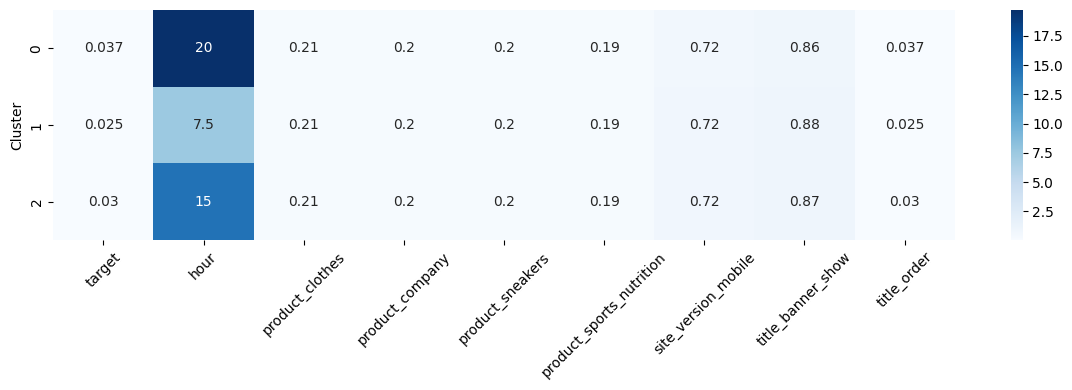

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
sns.heatmap(cluster_summary, annot=True, cmap='Blues')
plt.xticks(rotation=45)
plt.tight_layout()

In [14]:
# Save the model
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']